<a href="https://colab.research.google.com/github/lucas6028/machine_learning/blob/main/Regression/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical Cost Personal Charges**

Author: *Hao*

Thanks
https://www.kaggle.com/code/hely333/eda-regression/notebook

## Import packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

warnings.filterwarnings('ignore')

## Download data from Kaggle

In [2]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)
file_path = path + "/insurance.csv"

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


## EDA

In [3]:
data = pd.read_csv(file_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No NaN in the data

In [5]:
from sklearn.preprocessing import LabelEncoder

# sex
le = LabelEncoder()
le.fit(data['sex'].drop_duplicates())
data['sex'] = le.transform(data['sex'])

# smoker
le.fit(data['smoker'].drop_duplicates())
data['smoker'] = le.transform(data['smoker'])

# region
le.fit(data['region'].drop_duplicates())
data['region'] = le.transform(data['region'])

### Purpose
The goal is to encode the categorical columns (`sex`, `smoker`, and `region`) in the `data` DataFrame into numeric values so that they can be used in machine learning models, which typically require numeric input.


### Key Points
- **Why use `drop_duplicates()`?**  
  To optimize the `fit` method by ensuring only unique values are considered. This avoids redundant processing.

- **Reusing the `LabelEncoder` instance (`le`)**:  
  The same encoder instance is reused for different columns, but it is re-fitted for each column. This ensures that the mappings for one column do not affect another.

- **Limitation**:  
  `LabelEncoder` assigns arbitrary integers to categories (e.g., "male" → 0, "female" → 1). This can introduce unintended relationships between categories. For example, in regression models, the difference between 1 and 0 might imply magnitude, which may not make sense for categorical data. In such cases, **one-hot encoding** might be a better choice.

### Outcome
After running this code block, the `data` DataFrame will have its `sex`, `smoker`, and `region` columns converted from strings to integers, ready for use in machine learning models.

In [6]:
data.corr()['charges'].sort_values()

,charges
region,-0.006208
sex,0.057292
children,0.067998
bmi,0.198341
age,0.299008
smoker,0.787251
charges,1.000000


<Axes: >

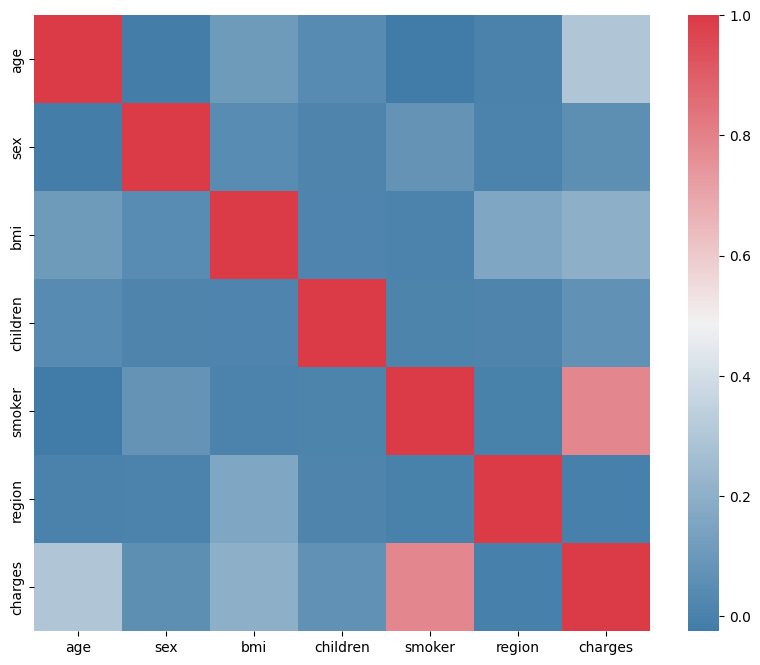

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Smoking and Age have strong relationship with charges as expected, but BMI did not.

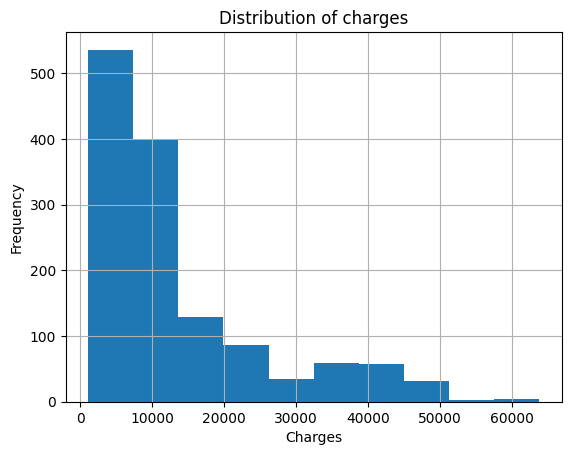

In [8]:
hist = data['charges'].hist()
plt.title("Distribution of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

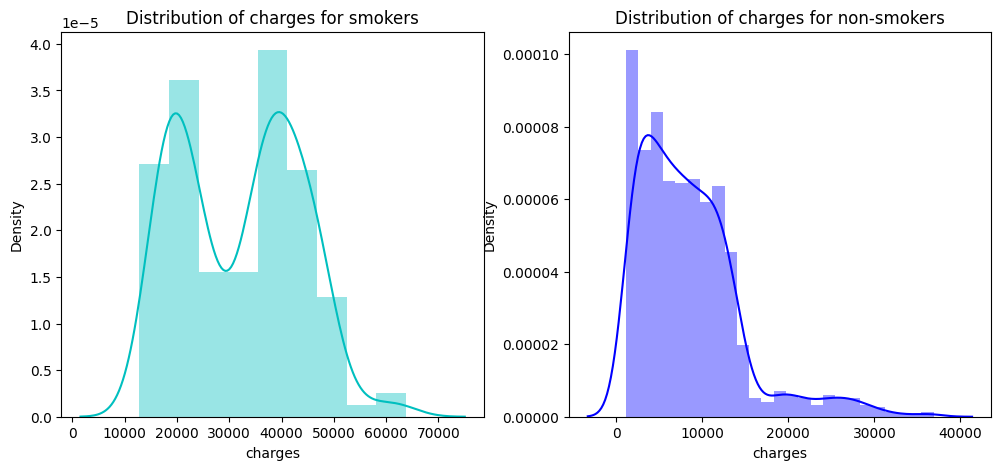

In [9]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

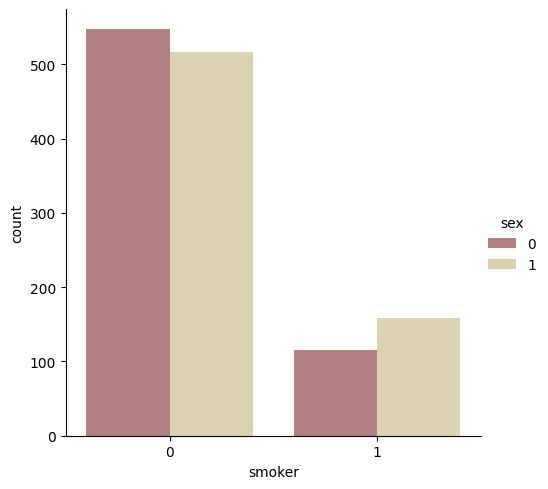

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Men: 0,
Women: 1
- Non-smoking people are greater than smoking people
- More male smokers than female smokers

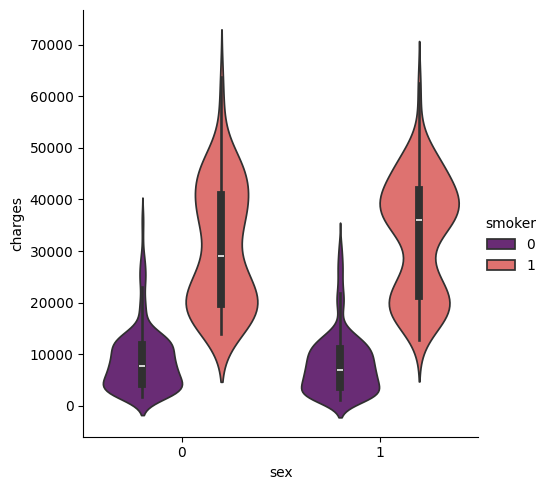

In [11]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

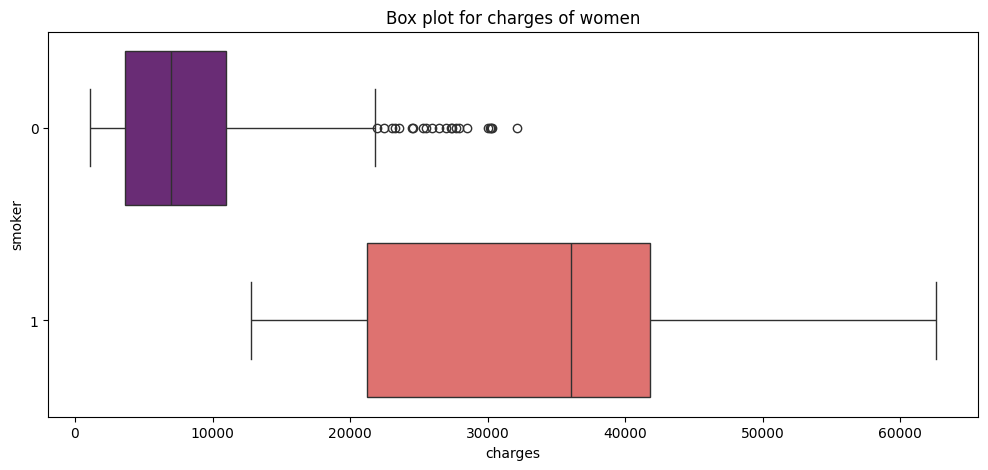

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

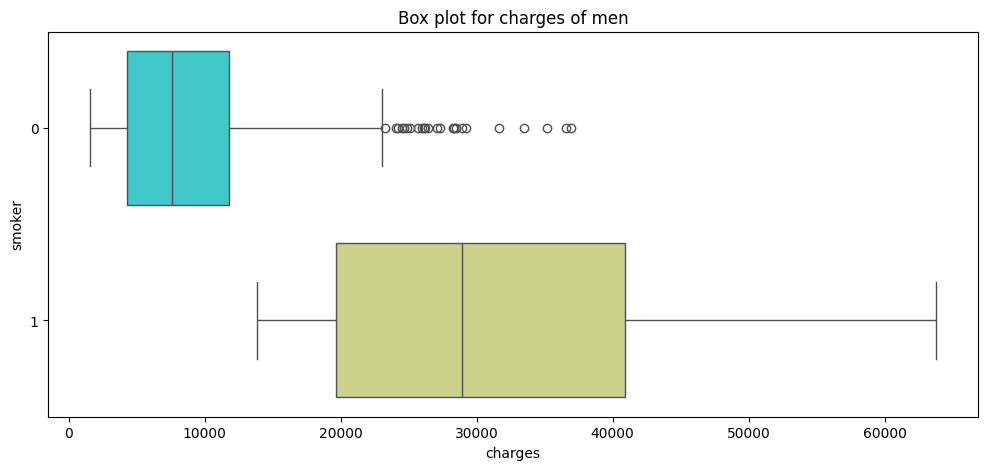

In [13]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

### Age

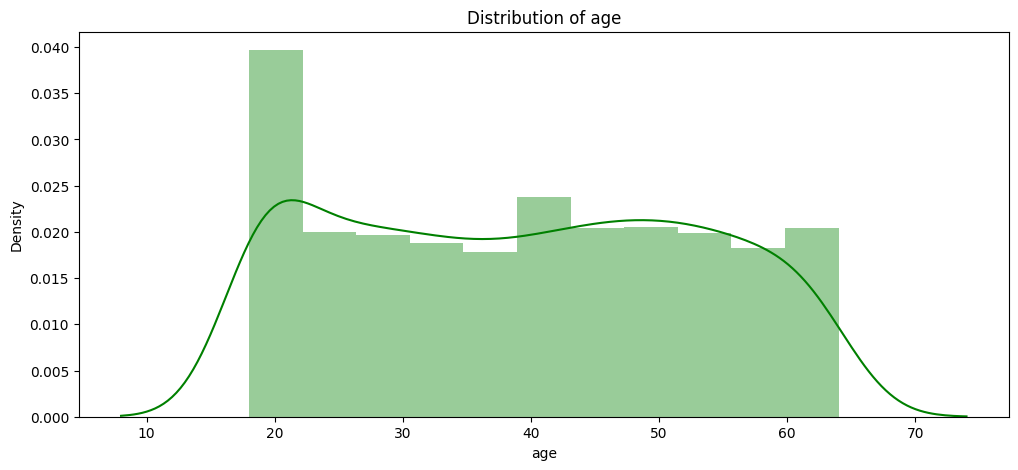

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

In [29]:
#non - smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [31]:
#smokers
p = figure(width=500, height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

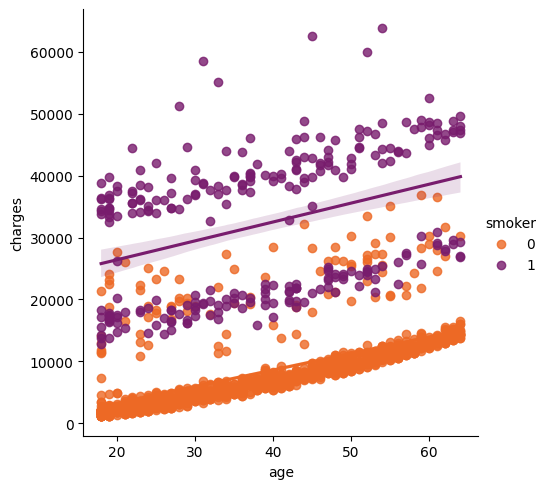

In [34]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

- The cost of treatment increase with age.

### BMI

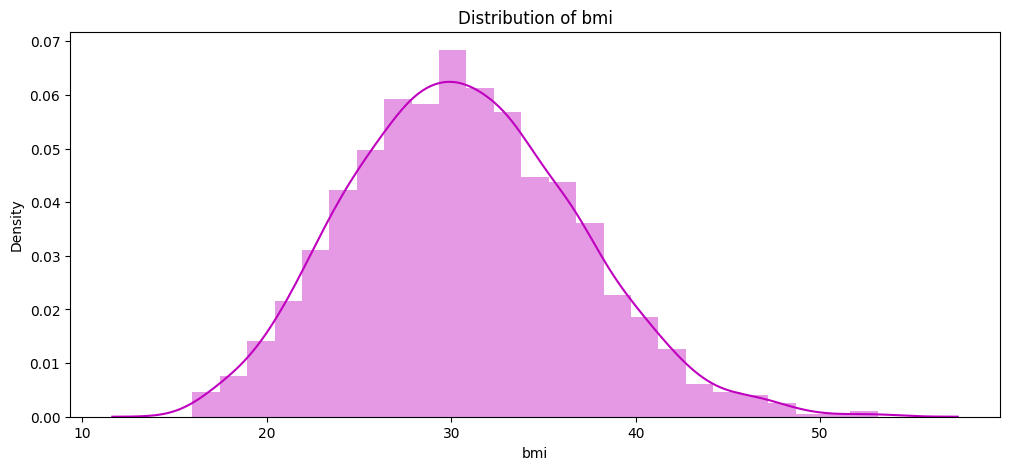

In [35]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

**BMI**
- < 18.5: Lightweight
- 18.5 - 24.9: Normal
- 25 - 29.9: Overweight
- 30 - 34.9: Obese

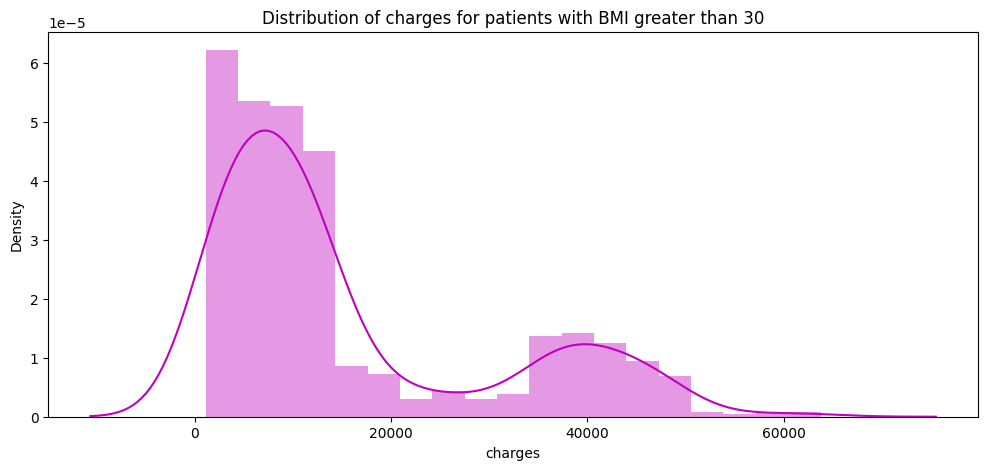

In [37]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

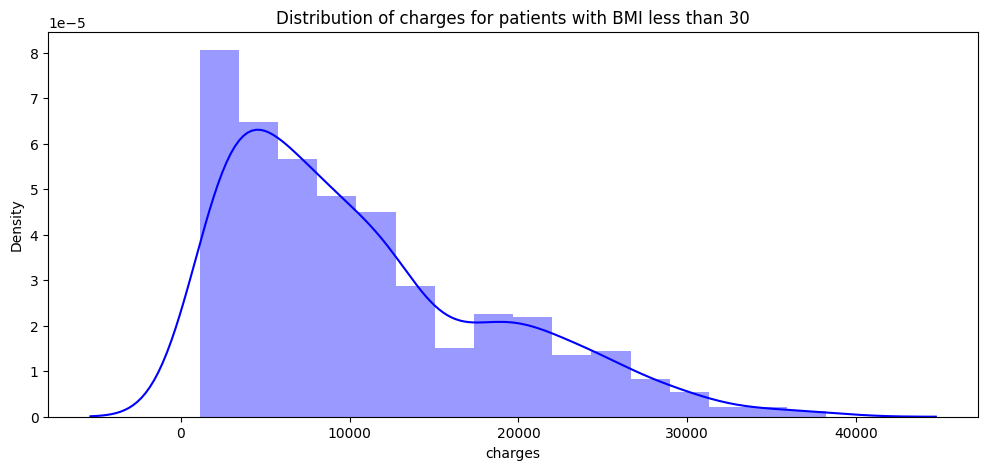

In [39]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment

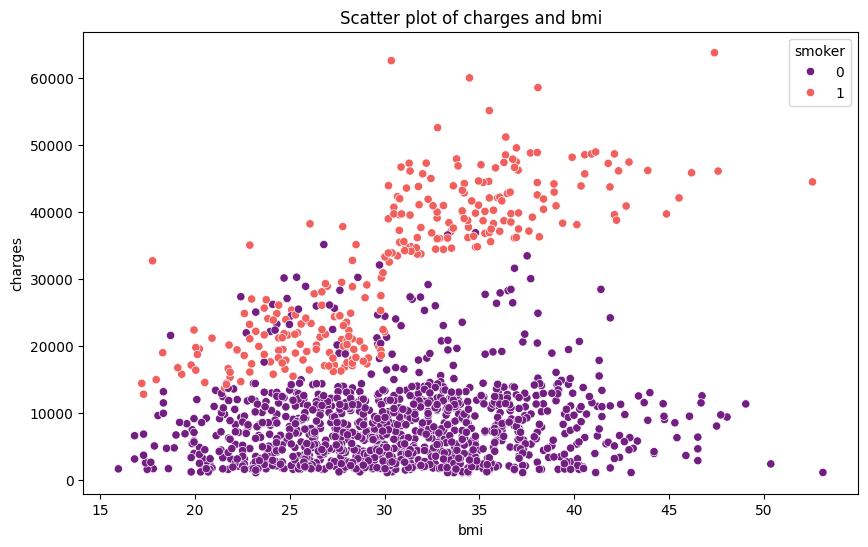

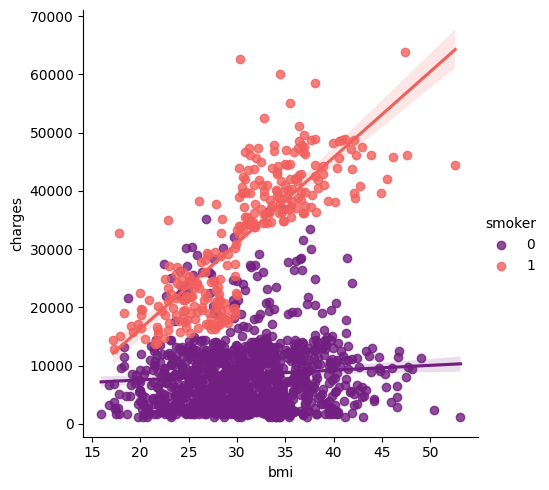

In [46]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

## Train the Regression Model

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [48]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [49]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147233


In [51]:
# Initialize the Random Forest Regressor
forest = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',  # Updated from 'mse'
    random_state=1,
    n_jobs=-1
)

# Fit the model to training data
forest.fit(x_train, y_train)

# Make predictions
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, forest_train_pred)
test_mse = mean_squared_error(y_test, forest_test_pred)
train_r2 = r2_score(y_train, forest_train_pred)
test_r2 = r2_score(y_test, forest_test_pred)

# Print results using f-strings
print(f'MSE train data: {train_mse:.3f}, MSE test data: {test_mse:.3f}')
print(f'R² train data: {train_r2:.3f}, R² test data: {test_r2:.3f}')

MSE train data: 3746684.434, MSE test data: 19965476.411
R² train data: 0.974, R² test data: 0.873


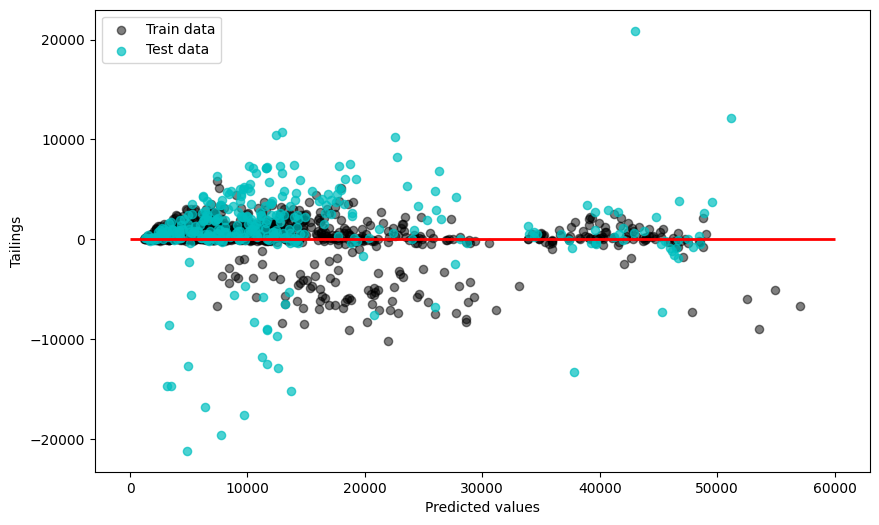

In [52]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()